# Analiza podatkov stanovanj na Bolhi 


V tem dokumentu imamo namen analizirati podatke o prodaji stanovanj, ki smo jih dobili na Bolhi. Imamo naslednji načrt:
* Najprej bomo pogledali število stanovanj po posamezni lokaciji.
* Nato bomo popravili nekatere napake, ki so se pojavile pri prenosu podatkov iz spletne strani.
* Lotili se bomo analize na stanovanjih, ki imajo smiseln podatek o ceni.
* Stanovanja z neničelno ceno bomo razdelili še v podtabele po regijah in jih analizirali.

In [118]:
import pandas as pd
import os.path

In [119]:
%matplotlib inline

stanovanja = pd.read_csv(os.path.join('podatki','stanovanja_Bolha.csv'))

Prikažimo, kako trenutno izgleda naša tabela.

In [120]:
stanovanja

,price,location,size,date
0,NaN,"Postojna, Postojna",Unknown,14.11.2022
1,680.0,"Ljubljana Šiška, Šiška",45,14.11.2022
2,NaN,"Maribor, Tabor",37,14.11.2022
3,600.0,"Primorsko-goranska, Rijeka",60,14.11.2022
4,700.0,"Ljubljana Bežigrad, Bežigrad",Unknown,13.11.2022
...,...,...,...,...
436,0.0,"Maribor, Tabor",60,07.10.2020
437,NaN,"Maribor, Kamnica",40,30.05.2020
438,160.0,"Laško, Laško",60,15.02.2020
439,120.0,"Kočevje, Kočevje",300,30.08.2019


## Preštevanje stanovanj po lokacijah

In [121]:
stevilo_stanovanj_v_Ljublajni = len(stanovanja.loc[stanovanja["location"].str.contains("Ljubljana")].index)
stevilo_stanovanj_v_Ljublajni

80

Vidimo, da imamo vsaj 80 stanovanj, ki se nahajajo v Ljubljani. Podrobneje bomo ta stanovanja analizirali kasneje, sedaj nam zadošča le število stanovanj.

In [122]:
stevilo_stanovanj_v_Mariboru = len(stanovanja.loc[stanovanja["location"].str.contains("Maribor")].index)
stevilo_stanovanj_v_Mariboru


102

Presenetljivo opazimo, da je v Mariboru kar 100 ponudnikov, kar je celo več kot v Ljubljani.

In [123]:
stevilo_stanovanj_v_Kranju = len(stanovanja.loc[stanovanja["location"].str.contains("Kranj")].index)
stevilo_stanovanj_v_Kranju

8

In [124]:
stevilo_stanovanj_v_Kopru = len(stanovanja.loc[stanovanja["location"].str.contains("Koper")].index)
stevilo_stanovanj_v_Kopru

6

In [125]:
stevilo_stanovanj_v_Celju = len(stanovanja.loc[stanovanja["location"].str.contains("Celje")].index)
stevilo_stanovanj_v_Celju

19

## Filtracija stanovnanj s smiselno ceno

Poglejmo, koliko je cena najdražjega stanovanja

In [126]:
stanovanja[["price"]].max()

price    995.0
dtype: float64

Opazimo, da je cena precej nizka. Pričakovali bi, da je najdražje stanovanje dražje od 1000 evrov. Sklepamo, da so stanovanja dražja od 1000 evrov zakodirana pod veliko nižjo ceno. To popravimo bomo poskusili odpraviti.

In [127]:
stanovanja = stanovanja.sort_values(by="price")

stanovanja

,price,location,size,date
282,0.0,"Izola, Jagodje",Unknown,23.10.2022
341,0.0,"Maribor, Center",Unknown,16.10.2022
245,0.0,"Sevnica, Sevnica",130,26.10.2022
31,0.0,"Lendava, Lendavske Gorice",70,11.11.2022
237,0.0,"Vransko, Vransko",35,27.10.2022
...,...,...,...,...
356,NaN,"Šempeter pri Gorici, Šempeter pri Gorici",25,15.10.2022
371,NaN,"Radovljica, Radovljica",Unknown,27.09.2022
431,NaN,"Maribor, Tabor",58,04.01.2021
433,NaN,"Maribor, Center",1,27.10.2020


V naslednjem koraku bomo stanovanjem s nedefinirano ceno podelili ceno 0. 

In [128]:
stanovanja["price"] = stanovanja["price"].fillna(0)

Ponovno urednimo stanovanja

In [129]:
stanovanja = stanovanja.sort_values(by="price")
stanovanja

,price,location,size,date
282,0.0,"Izola, Jagodje",Unknown,23.10.2022
108,0.0,"Žalec, Žalec",26,07.11.2022
109,0.0,"Šoštanj, Šoštanj",55,07.11.2022
111,0.0,"Kranjska Gora, Gozd Martuljek",40,07.11.2022
136,0.0,"Logatec, Grčarevec",80,05.11.2022
...,...,...,...,...
397,950.0,"Ljubljana Center, Center",49,12.09.2022
411,950.0,"Bled, Bohinjska Bela",Unknown,30.07.2022
9,980.0,"Ljubljana Center, Stara Ljubljana",25,13.11.2022
97,990.0,"Maribor, Tabor",114,08.11.2022


Sedaj si bomo naredili posebno tabelo, ki bo vsebovala le stanovanja, ki imajo neničelno ceno.

In [130]:
st = stanovanja[stanovanja.price > 0]
st

,price,location,size,date
256,1.0,"Maribor, Center",122.9,25.10.2022
358,1.0,"Primorsko-goranska, Rijeka",94,12.10.2022
377,1.0,"Primorsko-goranska, Rijeka",90,23.09.2022
348,1.0,"Izola, Jagodje",80,16.10.2022
379,1.0,"Primorsko-goranska, Kostrena",70,22.09.2022
...,...,...,...,...
397,950.0,"Ljubljana Center, Center",49,12.09.2022
411,950.0,"Bled, Bohinjska Bela",Unknown,30.07.2022
9,980.0,"Ljubljana Center, Stara Ljubljana",25,13.11.2022
97,990.0,"Maribor, Tabor",114,08.11.2022


Stanovanjem v tej novi tabeli podelimo nove indekse.

In [131]:
st = st.reset_index(drop=True)
st

,price,location,size,date
0,1.0,"Maribor, Center",122.9,25.10.2022
1,1.0,"Primorsko-goranska, Rijeka",94,12.10.2022
2,1.0,"Primorsko-goranska, Rijeka",90,23.09.2022
3,1.0,"Izola, Jagodje",80,16.10.2022
4,1.0,"Primorsko-goranska, Kostrena",70,22.09.2022
...,...,...,...,...
322,950.0,"Ljubljana Center, Center",49,12.09.2022
323,950.0,"Bled, Bohinjska Bela",Unknown,30.07.2022
324,980.0,"Ljubljana Center, Stara Ljubljana",25,13.11.2022
325,990.0,"Maribor, Tabor",114,08.11.2022


Kot smo opazili že prej, imamo največjo ceno stanovananja pod 1000 evrov. Če se sprehodimo po spletni strani vidimo, da imamo cene nekje med 10 evrov do 9000 evrov. Sklepamo, da je prvih nekaj vrstic, kjer je cena nižja od 10 evrov, program narobe prebral. Zato te vrednosti pomnožimo s 1000.

In [132]:
st.loc[st["price"] < 10, "price"] = st.price.mul(1000)
st

,price,location,size,date
0,1000.0,"Maribor, Center",122.9,25.10.2022
1,1000.0,"Primorsko-goranska, Rijeka",94,12.10.2022
2,1000.0,"Primorsko-goranska, Rijeka",90,23.09.2022
3,1000.0,"Izola, Jagodje",80,16.10.2022
4,1000.0,"Primorsko-goranska, Kostrena",70,22.09.2022
...,...,...,...,...
322,950.0,"Ljubljana Center, Center",49,12.09.2022
323,950.0,"Bled, Bohinjska Bela",Unknown,30.07.2022
324,980.0,"Ljubljana Center, Stara Ljubljana",25,13.11.2022
325,990.0,"Maribor, Tabor",114,08.11.2022


Tabelo "st" ponovno urednimo po ceni in ji posodobimo indekse.

In [133]:
st = st.sort_values(by="price")
st = st.reset_index(drop=True)
st

,price,location,size,date
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",Unknown,06.11.2022
1,10.0,"Kidričevo, Kungota pri Ptuju",45,20.10.2022
2,30.0,"Hrastnik, Hrastnik",80,24.10.2022
3,30.0,"Celje, Center",35,25.10.2022
4,45.0,"Trebnje, Trebnje",24,09.11.2022
...,...,...,...,...
322,2700.0,"Ljubljana Center, Center",151.4,01.02.2022
323,2800.0,"Ljubljana Center, Stara Ljubljana",Unknown,28.09.2022
324,2900.0,"Ljubljana Moste Polje, Zelena jama",234.3,26.10.2022
325,3100.0,"Ljubljana Vič Rudnik, Vič - Dolgi most",140,28.06.2022


## Dodajanje novih stolpcev v tabelo "st"

Sedaj, ko smo končno uredili podatke, glede cene, bomo na tej tabeli dodali še nekaj stolpcev, ki bodo služili kot pomoč pri natančni analizi. Najprej bomo dodali parameter cena na kvadratni meter. Preden storim to, bom stanovanjem z neznano površino podelil površino, ki je povprečje površinj stanovanj, ki imamo znano površino.

In [134]:
vsota_površine = st[st["size"] != "Unknown"]["size"].astype(float).sum()


In [135]:
število_st_s_površino = st[st["size"] != "Unknown"]["size"].astype(float).count()

In [136]:
povprečna_površina = vsota_površine / float(število_st_s_površino)
povprečna_površina

61.354655172413786

Sedaj bomo stanovanjem z neznanim podatkom o površini podelili to "povprečno_površino"

In [137]:
st["size"] = st["size"].replace(["Unknown"], povprečna_površina)
st

,price,location,size,date
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",61.354655,06.11.2022
1,10.0,"Kidričevo, Kungota pri Ptuju",45,20.10.2022
2,30.0,"Hrastnik, Hrastnik",80,24.10.2022
3,30.0,"Celje, Center",35,25.10.2022
4,45.0,"Trebnje, Trebnje",24,09.11.2022
...,...,...,...,...
322,2700.0,"Ljubljana Center, Center",151.4,01.02.2022
323,2800.0,"Ljubljana Center, Stara Ljubljana",61.354655,28.09.2022
324,2900.0,"Ljubljana Moste Polje, Zelena jama",234.3,26.10.2022
325,3100.0,"Ljubljana Vič Rudnik, Vič - Dolgi most",140,28.06.2022


Da bodo vsi podatki v stolpcu "size" enakega tipa, vse podatke spremenimo v tip float. 

In [138]:
st["size"] = st["size"].astype(float)
st

,price,location,size,date
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",61.354655,06.11.2022
1,10.0,"Kidričevo, Kungota pri Ptuju",45.000000,20.10.2022
2,30.0,"Hrastnik, Hrastnik",80.000000,24.10.2022
3,30.0,"Celje, Center",35.000000,25.10.2022
4,45.0,"Trebnje, Trebnje",24.000000,09.11.2022
...,...,...,...,...
322,2700.0,"Ljubljana Center, Center",151.400000,01.02.2022
323,2800.0,"Ljubljana Center, Stara Ljubljana",61.354655,28.09.2022
324,2900.0,"Ljubljana Moste Polje, Zelena jama",234.300000,26.10.2022
325,3100.0,"Ljubljana Vič Rudnik, Vič - Dolgi most",140.000000,28.06.2022


Sedaj lahko končno dodamo stolpec cene na kvadratni meter.

In [139]:
st["per_m^2"] = st["price"] / st["size"] 
st

,price,location,size,date,per_m^2
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",61.354655,06.11.2022,0.162987
1,10.0,"Kidričevo, Kungota pri Ptuju",45.000000,20.10.2022,0.222222
2,30.0,"Hrastnik, Hrastnik",80.000000,24.10.2022,0.375000
3,30.0,"Celje, Center",35.000000,25.10.2022,0.857143
4,45.0,"Trebnje, Trebnje",24.000000,09.11.2022,1.875000
...,...,...,...,...,...
322,2700.0,"Ljubljana Center, Center",151.400000,01.02.2022,17.833554
323,2800.0,"Ljubljana Center, Stara Ljubljana",61.354655,28.09.2022,45.636309
324,2900.0,"Ljubljana Moste Polje, Zelena jama",234.300000,26.10.2022,12.377294
325,3100.0,"Ljubljana Vič Rudnik, Vič - Dolgi most",140.000000,28.06.2022,22.142857


Stolpec datumov bomo za potrebe lažje analize raje zamenjali z stolpcem starosti.

In [140]:
import datetime
st["date"] = (datetime.datetime.now() - st["date"].apply(pd.to_datetime))
st.date = st["date"].dt.days
st


C:\Users\marti\AppData\Local\Temp\ipykernel_2260\2344210075.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  st["date"] = (datetime.datetime.now() - st["date"].apply(pd.to_datetime))


,price,location,size,date,per_m^2
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",61.354655,240,0.162987
1,10.0,"Kidričevo, Kungota pri Ptuju",45.000000,109,0.222222
2,30.0,"Hrastnik, Hrastnik",80.000000,105,0.375000
3,30.0,"Celje, Center",35.000000,104,0.857143
4,45.0,"Trebnje, Trebnje",24.000000,148,1.875000
...,...,...,...,...,...
322,2700.0,"Ljubljana Center, Center",151.400000,400,17.833554
323,2800.0,"Ljubljana Center, Stara Ljubljana",61.354655,131,45.636309
324,2900.0,"Ljubljana Moste Polje, Zelena jama",234.300000,103,12.377294
325,3100.0,"Ljubljana Vič Rudnik, Vič - Dolgi most",140.000000,223,22.142857


## Analiza stanovanj z neničelno ceno

Recimo, da nas zanimajo stanovanja, ki so čim cenejša na kvadratni meter, niso prevelika ne premajhna ter njihov oglas ni na spletni strani predolgo. Da bomo vedeli, kaj je to preveliko, kaj premajhno, moramo najprej dobiti občutek, kako so porazdeljene velikosti stanovanj. 

Za to, da dobimo občutek o tej porazdeljenosti bomo izračunali:
* povprečje,
* prvi kvartil, mediano in tretji kvartil,
* maksimum,
* minimum,
* standrdni odklon.

In [141]:
average = st["size"].mean()
average

61.35465517241379

In [142]:
st["size"].quantile([0.25, 0.5, 0.75])

0.25    41.5
0.50    60.0
0.75    70.0
Name: size, dtype: float64

Komentar: Vidimo, da je veliko vrednosti zgoščenih med 60 in 70.

In [143]:
maksimum = st["size"].max()
maksimum

300.0

In [144]:
minimum = st["size"].min()
minimum

12.0

In [145]:
std = st["size"].std()
std

31.958025913579167

Za konec porazdelitev še upodobimo z grafom.

<AxesSubplot: ylabel='Frequency'>

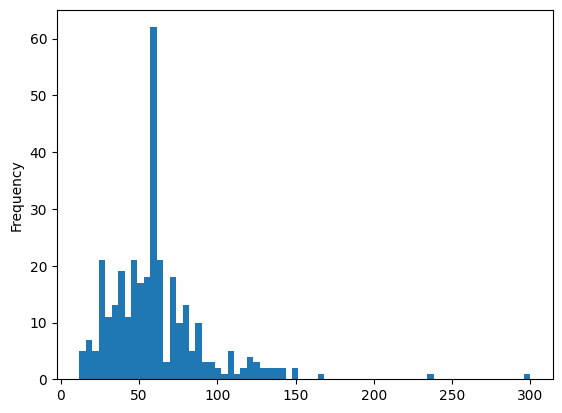

In [146]:
st["size"].plot.hist(bins=70)

Pravijo, da slika pove več kot tisoč besed. V tem primeru je res tako. Vidimo nenavadno pogostost stanovanj, ki so velika približno 60 kvadratnih metrov. Zato bomo pri iskanju našega idealnega stanja iz začetka podpoglavja stanovanjem, z velikostjo pod 40 kvadratnih metrov podelili 1 točko, stanovanjem med 40 in 55 kvadrati 4 točke, stanovnjem med 55 in 70 metrov 6 točk, med 70 in 100 4 točke in večjim 1 točko. 

Dodajmo stolpec z temi točkami.

In [147]:
st["size_index"] = 0
st.loc[st['size'] < 40, 'size_index'] = 1
st.loc[(st['size'] >= 40) & (st['size'] < 55), 'size_index'] = 4
st.loc[(st['size'] >= 55) & (st['size'] < 70), 'size_index'] = 6
st.loc[(st['size'] >= 70) & (st['size'] < 100), 'size_index'] = 4
st.loc[st['size'] >= 100, 'size_index'] = 1
st

,price,location,size,date,per_m^2,size_index
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",61.354655,240,0.162987,6
1,10.0,"Kidričevo, Kungota pri Ptuju",45.000000,109,0.222222,4
2,30.0,"Hrastnik, Hrastnik",80.000000,105,0.375000,4
3,30.0,"Celje, Center",35.000000,104,0.857143,1
4,45.0,"Trebnje, Trebnje",24.000000,148,1.875000,1
...,...,...,...,...,...,...
322,2700.0,"Ljubljana Center, Center",151.400000,400,17.833554,1
323,2800.0,"Ljubljana Center, Stara Ljubljana",61.354655,131,45.636309,6
324,2900.0,"Ljubljana Moste Polje, Zelena jama",234.300000,103,12.377294,1
325,3100.0,"Ljubljana Vič Rudnik, Vič - Dolgi most",140.000000,223,22.142857,1


Sedaj ustvarimo indeks, ki nam bo povedal, kako primerno je za nas neko stanovnaje. Večji, kot bo indeks bolj primerno je za nas neko stanovanje. Šlo bo za zmnožek 'size_index' obratne vrednosti 'per_m^2' in razlike maksimuma stolpca 'date' in vrednosti 'date'.

In [148]:
st['index'] = st['size_index'] * (1 / st['per_m^2']) * (st['date'].max() - st['date'])
st

,price,location,size,date,per_m^2,size_index,index
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",61.354655,240,0.162987,6,39463.314207
1,10.0,"Kidričevo, Kungota pri Ptuju",45.000000,109,0.222222,4,21654.000000
2,30.0,"Hrastnik, Hrastnik",80.000000,105,0.375000,4,12874.666667
3,30.0,"Celje, Center",35.000000,104,0.857143,1,1409.333333
4,45.0,"Trebnje, Trebnje",24.000000,148,1.875000,1,620.800000
...,...,...,...,...,...,...,...
322,2700.0,"Ljubljana Center, Center",151.400000,400,17.833554,1,51.139556
323,2800.0,"Ljubljana Center, Stara Ljubljana",61.354655,131,45.636309,6,155.271102
324,2900.0,"Ljubljana Moste Polje, Zelena jama",234.300000,103,12.377294,1,97.678862
325,3100.0,"Ljubljana Vič Rudnik, Vič - Dolgi most",140.000000,223,22.142857,1,49.180645


Sedaj tabelo 'st' urednimo glede na 'index'.

In [149]:
st.sort_values('index', ascending=False)

,price,location,size,date,per_m^2,size_index,index
0,10.0,"Kidričevo, Spodnji Gaj pri Pragerskem",61.354655,240,0.162987,6,39463.314207
1,10.0,"Kidričevo, Kungota pri Ptuju",45.000000,109,0.222222,4,21654.000000
2,30.0,"Hrastnik, Hrastnik",80.000000,105,0.375000,4,12874.666667
5,50.0,"Kranj, Kranj",65.000000,271,0.769231,6,8119.800000
6,65.0,"Celje, Center",60.000000,210,1.083333,6,6103.384615
...,...,...,...,...,...,...,...
100,400.0,"Maribor, Limbuš",15.000000,105,26.666667,1,45.262500
259,800.0,"Ljubljana Šiška, Šentvid",37.320000,360,21.436227,1,44.410800
46,300.0,"Maribor, Center",12.000000,240,25.000000,1,42.880000
276,980.0,"Ljubljana Center, Stara Ljubljana",25.000000,85,39.200000,1,31.301020


Vidimo, da je nekako glavni faktor 'index'-a stolpec 'price', saj stanovanja, ki so rangirana najvišje, izrazito izstopajo po nizki ceni. Opazimo, da je 'size_index' prav tako nekako dober pokazatelj, kako primerno je za nas neko stanovnaje, vendar obstajajo pogoste izjeme. Datum pa očitno od vseh treh faktorjev najmanj vpliva na razporeditev, saj opazimo, da je oglas, ki je na prvem mestu kar trikrat starejši od oglasa na predzadnjem mestu.

Zaradi nenavadnosti rezultatov pri stolpcu 'date' si na podoben način kot pri velikosti poglejmo še razporeditev stanovanj glede na starost.

In [150]:
average1 = st['date'].mean()
average1

176.36697247706422

In [151]:
st["date"].quantile([0.25, 0.5, 0.75])

0.25    104.0
0.50    118.0
0.75    210.0
Name: date, dtype: float64

KOMENTAR: Pri velikostih sta bili mediana in povprečje dokaj poravnana, tukaj pa je med njima velika razlika. Vidimo, da je veliko stanovanj zgoščenih nekaj pod mediano, višje pa so precej bolj razpršeni. 

In [152]:
maksimum1 = st['date'].max()
maksimum1

1312

In [153]:
minimum1 = st['date'].min()
minimum1

57

In [154]:
std1 = st['date'].std()
std1

139.48566743997063

KOMENTAR: Standardni odklon je ogromen.

<AxesSubplot: ylabel='Frequency'>

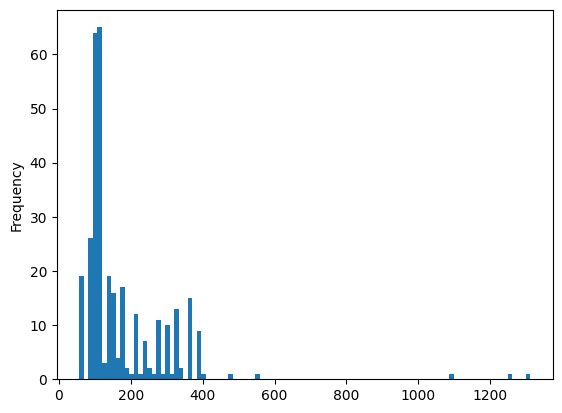

In [155]:
st['date'].plot.hist(bins=100)

Ponovno slika pove več kot tisoč besed.

Narišimo še graf odvisnosti 'index'-a od 'price'.

<AxesSubplot: xlabel='price', ylabel='index'>

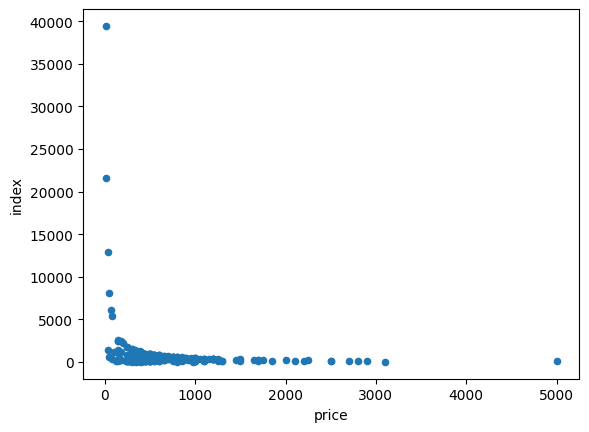

In [156]:
st.plot.scatter(x = 'price', y = 'index')

Ker vidimo, da nekaj vrednsoti precej izstopa, bi bilo zanimivo videti, kako izgleda graf, če ostranimo nekaj vrednosti.

<AxesSubplot: xlabel='price', ylabel='index'>

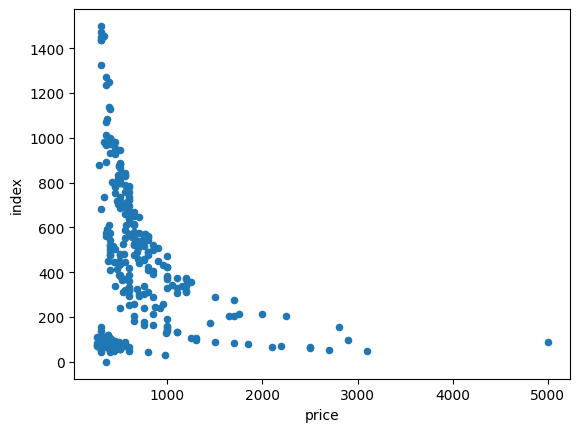

In [157]:
st[30:].plot.scatter(x = 'price', y = 'index')

## Analiza stanovanj po mestih

Glede na to, da smo na začetku ugotovili, da je največ stanovanj iz Maribora, bomo najprej analizirali te.

In [158]:
mr = st.loc[st["location"].str.contains("Maribor")]
mr

,price,location,size,date,per_m^2,size_index,index
22,180.0,"Hoče, Slivnica pri Mariboru",40.000000,57,4.500000,4,1115.555556
23,200.0,"Maribor, Magdalena",61.354655,101,3.259736,6,2229.014622
31,260.0,"Maribor, Kamnica",20.000000,360,13.000000,1,73.230769
33,260.0,"Maribor, Center",16.000000,118,16.250000,1,73.476923
35,280.0,"Maribor, Pobrežje",26.000000,148,10.769231,1,108.085714
...,...,...,...,...,...,...,...
278,995.0,"Maribor, Center",130.000000,273,7.653846,1,135.748744
279,1000.0,"Maribor, Center",122.900000,104,8.136697,1,148.463200
290,1050.0,"Maribor, Studenci",61.354655,334,17.113616,6,342.884873
296,1150.0,"Maribor, Koroška vrata",61.354655,258,18.743484,6,337.397252


In [159]:
mr_len = len(mr)
mr_len

82

In [160]:
mr_av = mr['index'].mean()
mr_av

495.2053661921997

In [161]:
mr_max = mr['index'].max()
mr_max

2229.014622413793

In [162]:
mr_min = mr['index'].min()
mr_min

42.88

In [163]:
mr_median = mr['index'].median()
mr_median

490.0635294117647

In [164]:
mr_std = mr['index'].std()
mr_std

362.3802890984916

S temi podatki o Mariborskih stanovanjih bomo kasneje izračunali nekaj primerjav med mesti. Sedaj enako storimo za Ljublajno, Kranj, Koper, Velenje, Novo mesto, Ptuj in Jesenice. Vsa ta mesta bomo nato primerjali in določili vtstni red glede na ponudbo, glede na povprečen indeks, glede na največji indeks, glede na najmanjši indeks in glede na raznolikost indeksa. Na koncu bomo vse združili v najnaselje leta.

In [165]:
lj = st.loc[st["location"].str.contains("Ljubljana")]
ce = st.loc[st["location"].str.contains("Celje")]
kr = st.loc[st["location"].str.contains("Kranj")]
ko = st.loc[st["location"].str.contains("Koper")]
ve = st.loc[st["location"].str.contains("Velenje")]
nm = st.loc[st["location"].str.contains("Novo mesto")]
pt = st.loc[st["location"].str.contains("Ptuj")]
je = st.loc[st["location"].str.contains("Jesenice")]